In [1]:
# You can install scikit image with the following code
# !conda install scikit-image

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
import skimage.filters as filters
import skimage.feature as feature
from skimage.measure import label
import os

from tqdm import tqdm

In [3]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is D657-68DB

 Directory of C:\Users\883241\Office 365 Fontys\TW - ds - 2024-2025\ds6\Week 4\casus\Reduced MNIST Data

10-12-2024  09:42    <DIR>          .
10-12-2024  09:42    <DIR>          ..
10-12-2024  09:42    <DIR>          .ipynb_checkpoints
06-12-2024  13:53            62.422 Case study.docx
10-12-2024  09:42            38.376 case_study.ipynb
12-11-2024  10:27        41.892.766 flat_data.csv
10-12-2024  09:42            38.507 make_data.ipynb
01-11-2024  14:44    <DIR>          Reduced Testing data
01-11-2024  14:51    <DIR>          Reduced Trainging data
01-11-2024  17:33            31.510 test_data.csv
01-11-2024  17:33           157.984 train_data.csv
13-11-2024  09:07           360.651 Untitled.ipynb
10-12-2024  09:22               617 Untitled1.ipynb
               8 File(s)     42.582.833 bytes
               5 Dir(s)  26.007.748.608 bytes free


In [4]:
train_path = 'Reduced Trainging data/8/'
train_files = os.listdir(train_path)

In [5]:
print(train_files[:10])

['4852.jpg', '4853.jpg', '4854.jpg', '4855.jpg', '4856.jpg', '4857.jpg', '4858.jpg', '4859.jpg', '4860.jpg', '4861.jpg']


In [6]:
train_path + train_files[5]

'Reduced Trainging data/8/4857.jpg'

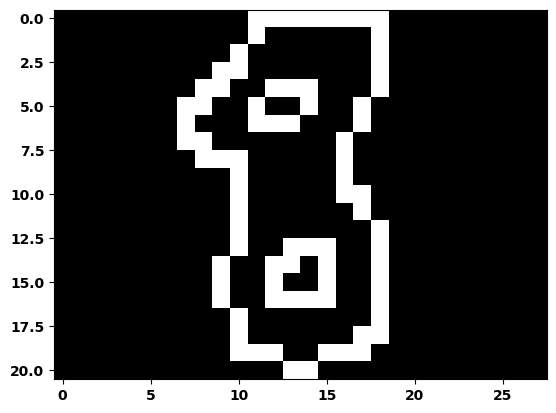

In [7]:
img = imread(train_path + train_files[5])
img = feature.canny(img)
filter1 = (img == True).any(axis = 1)
plt.imshow(img[filter1], cmap = 'gray')

In [8]:
img.reshape(784).sum()

80

In [11]:
def calculate_features(file: str) -> (dict, np.array):
    """
    Write a nice docstring
    """
    # Load your image

    # Do your calculations here
    
    img_features = {
    }
    return img_features, img

In [13]:
for i in range(10):
    # Load i^th digit folder
    train_path = f'Reduced Trainging data/{i}/'
    train_files = os.listdir(train_path)

    # For all images, extract the features
    for f in tqdm(train_files, desc = f'Extracting training features {i}'):
        img_features, img = calculate_features(train_path + f)
        continue

    # repeat, but for the test data
    test_path = f'Reduced Testing data/{i}/'
    test_files = os.listdir(test_path)
    for f in tqdm(test_files, desc = f'Extracting testing features {i}'):
        continue

Extracting testing features 9: 100%|█████████████████████████████████████████████████████████| 200/200 [00:00<?, ?it/s]
